# **Tugas Pemrograman Pengantar AI 2 Fuzzy Logic**

- Afrizal Syahruluddin Yusuf     (1301194288)
- Ni Made Dwipadini Puspitarini  (1301194141)
- Iqbal Saviola Syah Bilhaq      (1301190318)

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Membaca Data Set**

In [56]:
url = 'https://github.com/AfrizalSY/Fuzzy_Logic-_Tupro2_AI/blob/main/restoran.xlsx?raw=true'
df = pd.read_excel(url)
df.head()

,id,pelayanan,makanan
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4


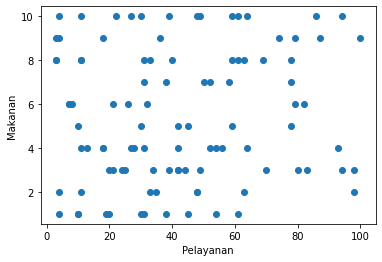

In [57]:
#Scatter Plot 
plt.scatter(df['pelayanan'], df['makanan'])
plt.xlabel("Pelayanan")
plt.ylabel("Makanan")
plt.show()

# **Inisiasi Nilai Linguistik**
Kami menentukan 4 nama linguistik untuk makanan yang masing-masing merepresentasikan bilangan real 1 - 10, yaitu :
1.   Tidak Enak (TE) = 1 - 3
2.   Cukup Enak (CE) = 4 - 6
3.   Enak (E) = 7 - 8
3.   Sangat Enak (SE) = 9 - 10

Sedangkan untuk pelayanan, kami membagi nilai linguistik menjadi 4 yang masing-masing merepresentasikan bilangan real 1 - 100 yaitu :
1.   Sangat Buruk (SR) = 1 - 35
2.   Buruk (R) = 36 - 60
3.   Baik (B) = 61 - 75
4.   Sangat Baik (SB) = 76 - 100



# **Fungsi Keanggotaan**

Fungsi Keanggotaan Makanan

In [58]:
def fkmakanan(x):
    makanan = {'TE': 0, 'CE' : 0, 'E' : 0, 'SE' : 0}
    titik = [3, 4, 6, 7, 8, 9]

    #Kategori makanan tidak enak (TE)
    if x <= titik[0]:
        makanan['TE'] = 1 
    if titik[0] < x <= titik[1]:
        makanan['TE'] = -(x - titik[1]) / (titik[1] - titik[0]) 
    
    #Kategori makanan cukup enak (CE)
    if titik[0] < x < titik[1]:
        makanan['CE'] = (x - titik[0]) / (titik[1] - titik[0]) 
    if titik[1] <= x <= titik[2]:
        makanan['CE'] = 1 
    if titik[2] < x <= titik[3]:
        makanan['CE'] = -(x - titik[3]) / (titik[3] - titik[2]) 

    #Kategori makanan enak (E)
    if titik[2] < x < titik[3]:
        makanan['E'] = (x - titik[2]) / (titik[3] - titik[2]) 
    if titik[3] <= x <= titik[4]:
        makanan['E'] = 1 
    if titik[4] < x < titik[5]:
        makanan['E'] = -(x - titik[5]) / (titik[5] - titik[4]) 

    #Kategori makanan sangat enak (SE)
    if x >= titik[5]:
        makanan['SE'] = 1 
    if titik[4] < x <= titik[5]:
        makanan['SE'] = (x - titik[4]) / (titik[5] - titik[4]) 
        
    return makanan

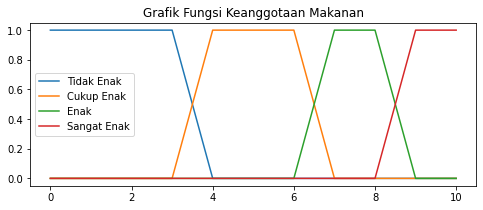

In [59]:
plt.figure(figsize=(8,3))
plt.title("Grafik Fungsi Keanggotaan Makanan")
plt.plot(range(11), [fkmakanan(x)['TE'] for x in range(11)], label='Tidak Enak')
plt.plot(range(11), [fkmakanan(x)['CE'] for x in range(11)], label='Cukup Enak')
plt.plot(range(11), [fkmakanan(x)['E'] for x in range(11)], label='Enak')
plt.plot(range(11), [fkmakanan(x)['SE'] for x in range(11)], label='Sangat Enak')
plt.legend()
plt.show()

Fungsi Keanggotaan Pelayanan

In [60]:
def fkpelayanan(x):
    pelayanan = {'SR': 0, 'R' : 0, 'B' : 0, 'SB' : 0}
    titik = [35, 36, 60, 61, 75, 76]

    #Kategori pelayanan sangat buruk (SR)
    if x <= titik[0]:
        pelayanan['SR'] = 1 
    if titik[0] < x <= titik[1]:
        pelayanan['SR'] = -(x - titik[1]) / (titik[1] - titik[0]) 
    
    #Kategori pelayanan buruk (R)
    if titik[0] < x < titik[1]:
        pelayanan['R'] = (x - titik[0]) / (titik[1] - titik[0]) 
    if titik[1] <= x <= titik[2]:
        pelayanan['R'] = 1 
    if titik[2] < x <= titik[3]:
        pelayanan['R'] = -(x - titik[3]) / (titik[3] - titik[2]) 

    #Kategori pelayanan baik (B)
    if titik[2] < x < titik[3]:
        pelayanan['B'] = (x - titik[2]) / (titik[3] - titik[2]) 
    if titik[3] <= x <= titik[4]:
        pelayanan['B'] = 1 
    if titik[4] < x < titik[5]:
        pelayanan['B'] = -(x - titik[5]) / (titik[5] - titik[4]) 

    #Kategori pelayanan sangat baik (SB)
    if x >= titik[5]:
        pelayanan['SB'] = 1 
    if titik[4] < x <= titik[5]:
        pelayanan['SB'] = (x - titik[4]) / (titik[5] - titik[4]) 
        
    return pelayanan

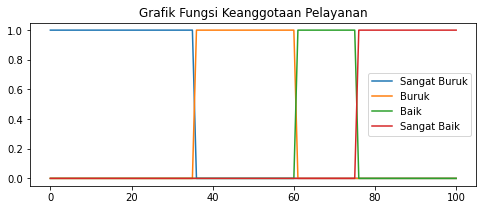

In [61]:
plt.figure(figsize=(8,3))
plt.title("Grafik Fungsi Keanggotaan Pelayanan")
plt.plot(range(101), [fkpelayanan(x)['SR'] for x in range(101)], label='Sangat Buruk')
plt.plot(range(101), [fkpelayanan(x)['R'] for x in range(101)], label='Buruk')
plt.plot(range(101), [fkpelayanan(x)['B'] for x in range(101)], label='Baik')
plt.plot(range(101), [fkpelayanan(x)['SB'] for x in range(101)], label='Sangat Baik')
plt.legend()
plt.show()

# **Fuzzifikasi**



In [62]:
def fuzzifikasi(data):
  hasilFuzzi = []

  for i in range(len(data)):
    hasil = [0,0]
    hasil[0] = fkpelayanan(data['pelayanan'][i])
    hasil[1] = fkmakanan(data['makanan'][i])

    hasilFuzzi.append(hasil)
  return hasilFuzzi

In [63]:
print('Example of Fuzzification Result :\n')
print("Restoran ID : ", df['id'][0])
print("Pelayanan : ", fuzzifikasi(df)[1][0])
print("Makanan : ", fuzzifikasi(df)[0][1])

Example of Fuzzification Result :

Restoran ID :  1
Pelayanan :  {'SR': 0, 'R': 1, 'B': 0, 'SB': 0}
Makanan :  {'TE': 0, 'CE': 0.0, 'E': 1, 'SE': 0}


# **Inferensi**

Aturan Inferensi (Disjungsi)

In [64]:
inference = pd.DataFrame([
                  ('Tidak Disarankan', 'Tidak Disarankan', 'Tidak Disarankan', 'Tidak Disarankan'),
                  ('Tidak Disarankan','Tidak Disarankan', 'Disarankan', 'Disarankan'),
                  ('Tidak Disarankan', 'Disarankan', 'Disarankan', 'Sangat Disarankan'),
                  ('Tidak Disarankan', 'Disarankan', 'Sangat Disarankan', 'Sangat Disarankan')],
                  index=['Makanan (TE)', 'Makanan (CE)', 'Makanan (E)', 'Makanan (SE)'],
                  columns=('Pelayanan (SR)', 'Pelayanan (R)', 'Pelayanan (B)','Pelayanan (SB)'))
inference

,Pelayanan (SR),Pelayanan (R),Pelayanan (B),Pelayanan (SB)
Makanan (TE),Tidak Disarankan,Tidak Disarankan,Tidak Disarankan,Tidak Disarankan
Makanan (CE),Tidak Disarankan,Tidak Disarankan,Disarankan,Disarankan
Makanan (E),Tidak Disarankan,Disarankan,Disarankan,Sangat Disarankan
Makanan (SE),Tidak Disarankan,Disarankan,Sangat Disarankan,Sangat Disarankan


In [65]:
def fuzzyRules(x, y) :
  rules = ''
  if x == 'TE':
    if y == 'SR' or y == 'R' or y == 'B' or y == 'SB':
      rules = 'Tidak Disarankan'
  elif x == 'CE':
    if y == 'SR' or y == 'R':
      rules = 'Tidak Disarankan'
    elif y == 'B' or y == 'SB':
      rules = 'Disarankan'
  elif x == 'E':
    if y == 'SR':
      rules = 'Tidak Disarankan'
    elif y == 'R' or y == 'B':
      rules = 'Disarankan'
    elif y == 'SB':
      rules = 'Sangat Disarankan'
  elif x == 'SE':
    if y == 'SR':
      rules = 'Tidak Disarankan'
    elif y == 'R':
      rules = 'Disarankan'
    elif y == 'B' or y == 'SB':
      rules = 'Sangat Disarankan'
  
  return rules

Tahap Inferensi

In [66]:
def inferensi(nilaiFuzzi):
  hasil = {'Tidak Disarankan': 0, 'Disarankan': 0, 'Sangat Disarankan': 0}
  for keyPelayanan in nilaiFuzzi[0].keys():
    for keyMakanan in nilaiFuzzi[1].keys():
      nilaiMin = min(nilaiFuzzi[0][keyPelayanan], nilaiFuzzi[1][keyMakanan])
      keyHasil = fuzzyRules(keyMakanan, keyPelayanan)
      hasil[keyHasil] = max(nilaiMin, hasil[keyHasil])
  return hasil

In [67]:
#Contoh hasil inferensi
hasilInferensi = []
hasilFuzzi = fuzzifikasi(df)
for i in hasilFuzzi:
  hasilInferensi.append(inferensi(i))
print('Example of Inference Result :\n')
print('Restoran ID: ', df['id'][0])
print('Status: ', hasilInferensi[0], end="\n\n")

Example of Inference Result :

Restoran ID:  1
Status:  {'Tidak Disarankan': 0, 'Disarankan': 1, 'Sangat Disarankan': 0}



# **Defuzzifikasi**

Sugeno Singleton Model

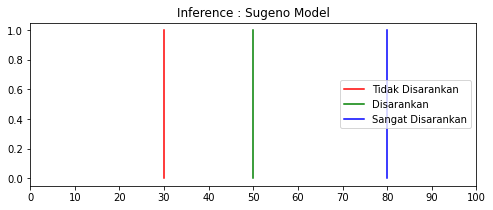

In [68]:
plt.figure(figsize=(8,3))
plt.plot([30, 30],[0, 1], 'r', linewidth=1.5, label= 'Tidak Disarankan')
plt.plot([50, 50],[0, 1], 'g', linewidth=1.5, label= 'Disarankan')
plt.plot([80, 80],[0, 1], 'b', linewidth=1.5, label= 'Sangat Disarankan')
plt.title('Inference : Sugeno Model')
plt.xticks(np.arange(0, 110, 10.0))
plt.legend()
plt.show()

Proses Defuzzification

In [69]:
defuzz = {'Tidak Disarankan' : 30, 'Disarankan' : 50, 'Sangat Disarankan' : 80}
def defuzzification(inferensi, deffuz):
    w, z = 0, 0
    for result in deffuz.keys():
        w += inferensi[result] * deffuz[result]
        z += inferensi[result]
    return w/z

# **Main Program**

In [70]:
hasilFuzzi = fuzzifikasi(df)
hasilInferensi = []
for i in hasilFuzzi:
  hasilInferensi.append(inferensi(i))
hasilDefuzz = []
for j in hasilInferensi:
    hasilDefuzz.append(defuzzification(j, defuzz))

print('Example of Defuzzification Result :\n')
print('Restoran ID: ', df['id'][10])
print('Nilai: ', hasilDefuzz[10])

Example of Defuzzification Result :

Restoran ID:  11
Nilai:  30.0


In [71]:
df['score'] = hasilDefuzz
bestResult = df.sort_values(by='score', ascending=False)[:10]
notBest = df.drop(bestResult.index)

bestResult['id'].to_excel('peringkat.xls', index=False, header=False)  
bestResult.head(10)

,id,pelayanan,makanan,score
23,24,100,9,80.0
41,42,94,10,80.0
24,25,61,10,80.0
30,31,74,9,80.0
78,79,87,9,80.0
69,70,78,8,80.0
68,69,86,10,80.0
62,63,78,7,80.0
21,22,79,9,80.0
53,54,64,10,80.0


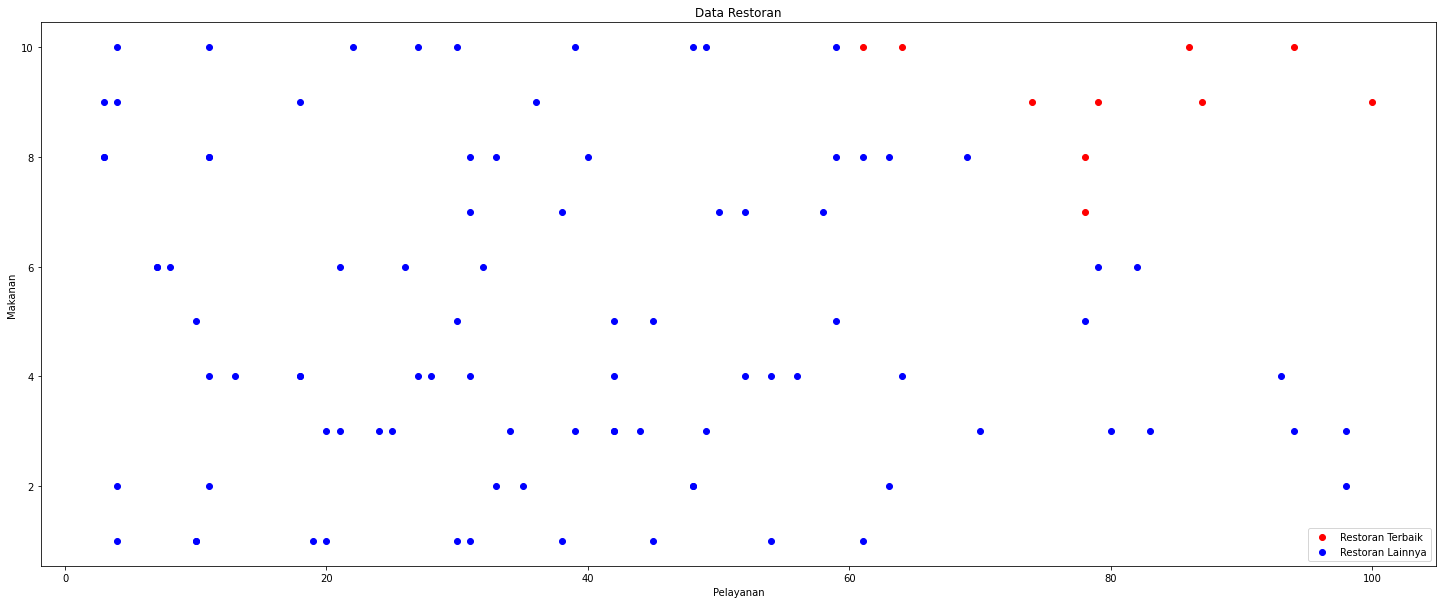

In [72]:
plt.figure(figsize=(25,10))
plt.scatter(bestResult.pelayanan,
            bestResult.makanan,
            label = "Restoran Terbaik",
            c = "r")
plt.scatter(notBest.pelayanan,
            notBest.makanan,
            label = "Restoran Lainnya",
            c = "b")
      
plt.xlabel('Pelayanan')
plt.ylabel('Makanan')
plt.title('Data Restoran')
plt.legend(loc='lower right')
plt.show()